# ECS7024 Statistics for Artificial Intelligence and Data Science - Course work 1

This notebook aims to draw a travel pattern of London's demographic during the peak hours of a day. The patterns focus on the exits made during the morning and evening peak hours at the respective stations in the dataset given. 

The libraries used are Pandas and Matplotlib, to suit the analytical needs of this coursework. 

1. **Part 1: Calculating Morning and Evening peak proportion**
   1. Importing the dataset 'hourlyExits.csv' into Pandas
   2. Calculating the total exits for each station
   3. Creating a dataframe - 'peak_counts' as subset for AM_peak and PM_peak
   4. Calculating the proportion of the population exit for AM_peak and PM_peak
   
   
2. **Part 2: Plotting and Analysing distributions**
   1. Describe the summary statistics of the 'peak_counts' dataframe. 
   2. Plotting a histogram for AM_proportion
   3. Plotting a histogram for PM_proportion
   
   
3. **Part 3: Classification of stations**
   1. Creating a classification on the basis of a threshold
   2. Creating a dataframe with the Northern line stations 
   3. Calculating the ratio of the exit proportion as a comparison metric
   


Import the dataset to python using the pandas package

In [1]:
#import the necessary modules 
import pandas as pd
import matplotlib.pyplot as plt

## Part 1 : Calculating Morning and Evening Peak proportion

### Importing dataset

In [2]:
#import the dataset into pandas
exits = pd.read_csv('hourlyExits.csv')

In [3]:
exits.head()

,Station,H05,H06,H07,H08,H09,H10,H11,H12,H13,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
0,Acton Town,30,208,710,812,448,231,221,259,301,...,634,917,1077,793,505,424,424,366,210,54
1,Aldgate,36,301,1319,3076,3013,1037,587,554,559,...,721,1116,1155,566,331,260,237,171,58,0
2,Aldgate East,50,324,1192,3045,3381,1340,897,920,919,...,935,1263,1605,1127,708,560,532,457,239,26
3,Alperton,16,101,230,372,254,149,137,152,176,...,444,679,724,424,222,161,143,146,72,6
4,Amersham,3,18,82,246,96,56,48,62,75,...,364,409,692,540,287,182,154,175,99,6


### Calculating total exits

In [4]:
#Assign a new column for the total number of exits
exits = exits.assign(Total_exits = exits.sum(axis=1))
exits

/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_4665/2164464043.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  exits = exits.assign(Total_exits = exits.sum(axis=1))


,Station,H05,H06,H07,H08,H09,H10,H11,H12,H13,...,H17,H18,H19,H20,H21,H22,H23,H00,H01,Total_exits
0,Acton Town,30,208,710,812,448,231,221,259,301,...,917,1077,793,505,424,424,366,210,54,9362
1,Aldgate,36,301,1319,3076,3013,1037,587,554,559,...,1116,1155,566,331,260,237,171,58,0,16136
2,Aldgate East,50,324,1192,3045,3381,1340,897,920,919,...,1263,1605,1127,708,560,532,457,239,26,21206
3,Alperton,16,101,230,372,254,149,137,152,176,...,679,724,424,222,161,143,146,72,6,5118
4,Amersham,3,18,82,246,96,56,48,62,75,...,409,692,540,287,182,154,175,99,6,3905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Wimbledon Park,4,38,173,192,132,83,73,99,129,...,364,467,333,183,146,139,108,53,10,3296
264,Wood Green,17,154,450,831,884,557,528,604,705,...,2334,2606,1802,1123,862,799,773,497,78,18989
265,Wood Lane,13,138,441,594,763,396,322,338,342,...,665,646,354,187,117,101,71,28,4,6610
266,Woodford,4,55,220,315,168,150,177,238,304,...,1395,1632,1101,615,421,407,373,200,45,9585


The dataset consists of the number of  exits during each hour of the day. By assigning a new column to the dataframe to display the total number of exits, we can quite conveniently view the total. 

### Dataframe subset for AM_peak and PM_peak

In [5]:
#creating a subset for AM_peak 
AM_peak = exits[['Station','H07','H08','H09']]
AM_peak = AM_peak.assign(Total_AM_exits = AM_peak.sum(axis=1))
AM_peak

/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_4665/1981314082.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  AM_peak = AM_peak.assign(Total_AM_exits = AM_peak.sum(axis=1))


,Station,H07,H08,H09,Total_AM_exits
0,Acton Town,710,812,448,1970
1,Aldgate,1319,3076,3013,7408
2,Aldgate East,1192,3045,3381,7618
3,Alperton,230,372,254,856
4,Amersham,82,246,96,424
...,...,...,...,...,...
263,Wimbledon Park,173,192,132,497
264,Wood Green,450,831,884,2165
265,Wood Lane,441,594,763,1798
266,Woodford,220,315,168,703


In [6]:
#creating a subset for PM_peak 
PM_peak = exits[['Station','H16', 'H17', 'H18']]
PM_peak = PM_peak.assign(Total_PM_exits = PM_peak.sum(axis=1))
PM_peak

/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_4665/3020449991.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  PM_peak = PM_peak.assign(Total_PM_exits = PM_peak.sum(axis=1))


,Station,H16,H17,H18,Total_PM_exits
0,Acton Town,634,917,1077,2628
1,Aldgate,721,1116,1155,2992
2,Aldgate East,935,1263,1605,3803
3,Alperton,444,679,724,1847
4,Amersham,364,409,692,1465
...,...,...,...,...,...
263,Wimbledon Park,283,364,467,1114
264,Wood Green,1554,2334,2606,6494
265,Wood Lane,455,665,646,1766
266,Woodford,862,1395,1632,3889


The AM_peak and PM_peak describes the exits made during the peak hours of the day. The AM_peak displays the exits during the day and PM_peak during the evening. Consequently, displaying the total number of exits for each station in the last columns of each dataframe. 

### Calculating the proportion of the population exit for AM_peak and PM_peak

In [7]:
#create a new empty dataframe
peak_counts = pd.DataFrame()

#assign the total exits from AM_peak and PM_peak into the new dataframe
peak_counts = peak_counts.assign(Station = exits['Station'],
                                 AM_peak = AM_peak['Total_AM_exits'],
                                PM_peak = PM_peak['Total_PM_exits'])
peak_counts

,Station,AM_peak,PM_peak
0,Acton Town,1970,2628
1,Aldgate,7408,2992
2,Aldgate East,7618,3803
3,Alperton,856,1847
4,Amersham,424,1465
...,...,...,...
263,Wimbledon Park,497,1114
264,Wood Green,2165,6494
265,Wood Lane,1798,1766
266,Woodford,703,3889


The dataframes consist of all the stations observable in London's transport line.  

The peak hours in the dataset have been classified as the daytime peak hours - AM Peak and evening peak hours as PM peak. Creating a new dataframe focusing on this to define the travel patterns of London's population.


In [8]:
#a sum of exits made at every station during AM_peak and PM_peak
total_exits = exits.pivot_table(values = 'Total_exits', index = 'Station')
total_exits

,Total_exits
Station,
Acton Town,9362
Aldgate,16136
Aldgate East,21206
Alperton,5118
Amersham,3905
...,...
Wimbledon Park,3296
Wood Green,18989
Wood Lane,6610


In [9]:
#function definition to calculate the proportion of exits during AM and PM
def am_peak(row):
    total = total_exits.loc[row.Station, 'Total_exits']
    return row.loc['AM_peak']/total

def pm_peak(row):
    total = total_exits.loc[row.Station, 'Total_exits']
    return row.loc['PM_peak']/total
        

In [10]:
peak_counts = peak_counts.assign(AM_proportion = peak_counts.apply(am_peak, axis = 1),
                                PM_proportion = peak_counts.apply(pm_peak, axis = 1))
peak_counts.set_index('Station')

,AM_peak,PM_peak,AM_proportion,PM_proportion
Station,,,,
Acton Town,1970,2628,0.210425,0.280709
Aldgate,7408,2992,0.459098,0.185424
Aldgate East,7618,3803,0.359238,0.179336
Alperton,856,1847,0.167253,0.360883
Amersham,424,1465,0.108579,0.375160
...,...,...,...,...
Wimbledon Park,497,1114,0.150789,0.337985
Wood Green,2165,6494,0.114013,0.341987
Wood Lane,1798,1766,0.272012,0.267171


The proportion calculation of the exits for respective stations can be used to assimilate the differences between the AM and PM. For instance, the proportion of exits for Acton Town is evident that PM exceeds the AM. 

## Part 2 : Plotting and Analysing Distributions

### Summary statistics

In [11]:
#summary statistics of the dataset
peak_counts.describe()

,AM_peak,PM_peak,AM_proportion,PM_proportion
count,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,0.207132,0.298750
std,8181.784059,6276.463316,0.122161,0.087724
min,27.000000,239.000000,0.045302,0.084630
25%,677.500000,1471.750000,0.116120,0.240947
50%,1517.000000,2622.000000,0.169378,0.307397
75%,4315.250000,4707.750000,0.266443,0.361596
max,61116.000000,59486.000000,0.630427,0.496079


This numerical description provides a clearer picture in comparison. As we are already aware that the number of stations in Transport for London is of 268. 
- The average population exits made during the peak hours are about 0.207132 and 0.298750. This shows that the distribution is at its highest average at PM. 
- The spread of the data seems quite diverse during the AM than the PM. This directly could imply that higher proportions of exits are made during the morning. 

It is quite interesting to note that although the PM proportion exceeds AM in every other statistic, the maximum number of exits are made only during the AM_peak. 

### Plotting AM_peak

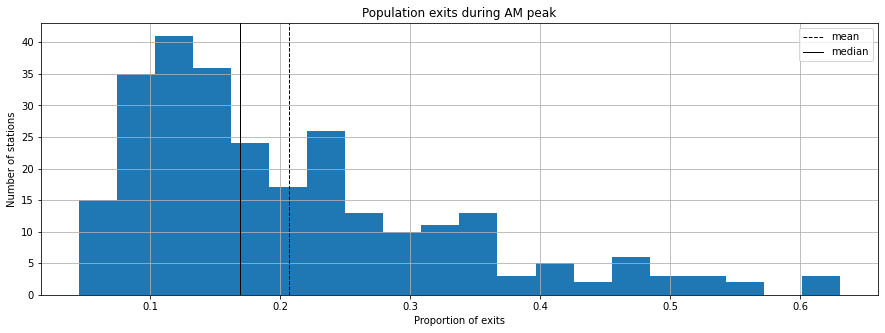

0.2071316333768281
0.16937840834182297


In [12]:
#plotting histogram for the AM peak hours
proportion_hist = peak_counts.hist(column= 'AM_proportion', bins = 20, figsize = (15,5))
plt.axvline(peak_counts.AM_proportion.mean(), color='k', linestyle='dashed', linewidth=1, label = 'mean')
plt.axvline(peak_counts.AM_proportion.median(),color = 'k', linestyle = 'solid', linewidth = 1, label = 'median')
plt.xlabel('Proportion of exits')
plt.ylabel('Number of stations')
plt.title('Population exits during AM peak')
plt.legend(loc = 'upper right')
plt.show()

#print the averages for specificity
print(peak_counts.AM_proportion.mean())
print(peak_counts.AM_proportion.median())

> The travel statistics for all the stations in the data set have been plotted using a histogram spread out with 20 bins. 

The number of exits made during the morning peak hours, is visibly dominated towards the left end. This translates to the fact that not many stations (here, approx. 40) have a higher proportion of exits. A majority of those stations have a traffic of less than the average (approx. 0.2071) and the median (approx. 0.17) as well. If this data is that of a weekday, it matches our expectation that the maximum proportion of the population (max = 0.630427) exits only at a handful stations (tail stretching toward the right end of the histogram). 

The range of stations during the morning peak hours are higher where the exits are low. To explain it further, this implies that the the population exits in higher proportion from very few stations in the city; leading us to believe that there are fewer busy areas in the city during the day. As the proportion of exits increase along the x-axis, the number of stations these exits are made at decrease. 

> A possible theory to this observation could be that the areas these exits are made during AM peak hours are that of *work places*. This theory could have an explanation if the PM peak hour distribution of the population supports this claim. 

### Plotting PM_peak

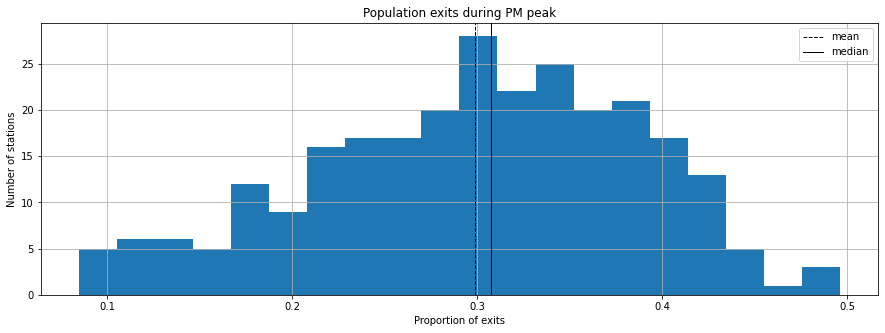

0.2987499040555359
0.307396527144117


In [13]:
#plotting a histogram for the PM_proportion
proportion_hist_PM = peak_counts.hist(column = 'PM_proportion', bins = 20, figsize =(15,5))
plt.axvline(peak_counts.PM_proportion.mean(),color = 'k', linestyle = 'dashed', linewidth = 1, label = 'mean')
plt.axvline(peak_counts.PM_proportion.median(),color = 'k', linestyle = 'solid', linewidth = 1, label = 'median')
plt.xlabel('Proportion of exits')
plt.ylabel('Number of stations')
plt.title('Population exits during PM peak')
plt.legend(loc = 'upper right')
plt.show()
print(peak_counts.PM_proportion.mean())
print(peak_counts.PM_proportion.median())


The travel frequency with respect to the PM peak hours has a dense distribution although the upper-bound does not increase beyond 0.5. As mentioned earlier, the distribution has a dense spread but it also exhibits the fact that the the number of stations displayed along the y-axis are restricted to above 25 in comparison to the exits displayed during the AM hours, that has a peak at just above 40. 

The upper-bound of exit proportion is less than 0.5 (max = 0.496079); making it lesser in comparison to the AM exits (max = 0.630427). One possible explanation for such an exception during the AM peak hours could be that an event may have been taking place at a certain location due to an influx. 

The average exit proportion is approximately 0.29875; the travel pattern visualised above portrays a peak with its inclination towards the right. This introduces us to the fact that 50% of the population exits at PM peak hours happen at a higher proportion at stations equal in number with the stations where the exits are lesser. The population is almost equally split between the 2, but just not exactly it, hence exhibiting inclination towards the right. 

> This distribution could possibly imply that the higher number of exits made during the PM peak are those of residential areas in London, forming a precedence to the claim made about work place station traffic. 


## Part 3: Classification of stations

### Classification on the basis of a threshold

In [14]:
#function definition to classify stations into 'Residential','Work','Other
def classify(row):
   
    if (row.PM_proportion > 0.266443): #using the 75% of the AM_peak as the threshold
        return 'Residential'
    elif (row.AM_proportion > 0.361596): #75% of the PM_peak as the threshold
        return 'Work'
    else:
         return 'Other'
    


In [15]:
#assigning a new column for station classification
peak_counts = peak_counts.assign(Classification = peak_counts.apply(classify, axis =1))

peak_counts
                                 

,Station,AM_peak,PM_peak,AM_proportion,PM_proportion,Classification
0,Acton Town,1970,2628,0.210425,0.280709,Residential
1,Aldgate,7408,2992,0.459098,0.185424,Work
2,Aldgate East,7618,3803,0.359238,0.179336,Other
3,Alperton,856,1847,0.167253,0.360883,Residential
4,Amersham,424,1465,0.108579,0.375160,Residential
...,...,...,...,...,...,...
263,Wimbledon Park,497,1114,0.150789,0.337985,Residential
264,Wood Green,2165,6494,0.114013,0.341987,Residential
265,Wood Lane,1798,1766,0.272012,0.267171,Residential
266,Woodford,703,3889,0.073344,0.405738,Residential


The stations under the northern line are classified into 3 factions, namely; Residential, Work and other. These are based on the statistics as follows : 
1. Residential areas - where the exits made during the PM peak hours are higher than those of AM peak.
2. Work place areas - where the exits made during the AM peak hours are significantly higher than those of PM peak. 
3. Other - where the exits approximately remain the same irrespective. 

The classification threshold chosen is the 75th percentile from the statistic description; reason being that the classification must have a significant difference between the exit proportions of work and residential areas. 

### Northern Line

In [16]:
#defining a function to subset the northern line stations
def north_line(area): 
    nl = area in ['Archway', 'Balham', 'Embankment', 'Goodge Street', 'Highgate', 'High Barnet', 'Leicester Square', 
                 'Morden', 'South Wimbledon', 'Tottenham Court Road', 'Warren Street']
    return nl

In [17]:
#creating a new dataframe to subset the northern line stations
northern_line = peak_counts.reset_index(drop=True)
northern_line = northern_line.loc[northern_line.Station.apply(north_line)==True]
northern_line = northern_line.set_index('Station')
northern_line

,AM_peak,PM_peak,AM_proportion,PM_proportion,Classification
Station,,,,,
Archway,2190,4106,0.157158,0.294654,Residential
Balham,2637,7635,0.119170,0.345038,Residential
Embankment,10692,8829,0.316509,0.261360,Other
Goodge Street,5374,1949,0.419287,0.152064,Work
High Barnet,987,2362,0.144235,0.345170,Residential
Highgate,893,3170,0.100101,0.355341,Residential
Leicester Square,8952,12915,0.187390,0.270347,Residential
Morden,1550,5955,0.098852,0.379783,Residential
South Wimbledon,1335,2198,0.185494,0.305405,Residential


### Ratio calculation

In [18]:
#creating a dataframe copy with an additional classification column
northern_line = northern_line.assign(Ratio = northern_line['PM_proportion']/ northern_line['AM_proportion'])

northern_line

,AM_peak,PM_peak,AM_proportion,PM_proportion,Classification,Ratio
Station,,,,,,
Archway,2190,4106,0.157158,0.294654,Residential,1.874886
Balham,2637,7635,0.119170,0.345038,Residential,2.895336
Embankment,10692,8829,0.316509,0.261360,Other,0.825758
Goodge Street,5374,1949,0.419287,0.152064,Work,0.362672
High Barnet,987,2362,0.144235,0.345170,Residential,2.393110
Highgate,893,3170,0.100101,0.355341,Residential,3.549832
Leicester Square,8952,12915,0.187390,0.270347,Residential,1.442694
Morden,1550,5955,0.098852,0.379783,Residential,3.841935
South Wimbledon,1335,2198,0.185494,0.305405,Residential,1.646442


An additional metric has been added to describe the significance of the classification: *Ratio of the exit proportion*. It is evident that the northern line has a higher number of 'Residential' areas in comparison to 'Work' and 'Other' areas. 

Following this classification, the 'Residential' areas consist of exits made with a significantly higher percentage; as the ratio increases, the significance between the exit proportions increases. For instance, Morden is tagged as a 'Residential' area because the PM proportion is approx. 28% higher than the AM proportion, rendering a ratio of 3.841935. On the contrary, Warren Street is tagged as a 'Work' area because the AM proportion is 40.8% higher than its counterpart with a ratio of 0.207661. 

The ratio column exhibits an analysis of the sort where **higher the ratio, the area is residential. Lower the ratio, the area is a work place.** Quite conveniently areas with a ratio almost close to 1 have been tagged as 'Other', proving that the exits at the peak hours during day and evening are approximately equal. 

> An interesting observation made through this simple analysis on the northern-line stations: The stations classified as 'Residential' fall under Zone 3 and 4 whilst the ones as 'Work' and 'Other' fall under Zone 1. Zone 1 is known for high traffic during peak hours of a day, thus the classification almost matches my expectations.